In [1]:
import numpy as np
from matplotlib import pyplot as plt
import importlib

import build.steps as steps
from utils import *

In [2]:
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.dpi"] = 100

In [3]:
iteration_time = 12
record_interval = 0.005
dt = 0.000001
sz = 0.5

In [4]:
r0 = np.array([
    [ 0, -20, -20, -20, -20, -20, -20, -20],
    [ 0,0.1, 0.5, 1, 2, 3, 4, 8],
    [ 0,  0,  0, 0, 0, 0, 0, 0]]);
v0 = np.array([
    [ 0, 1, 1, 1, 1, 1, 1, 1],
    [ 0, 0, 0, 0, 0, 0, 0, 0],
    [ 0, 0, 0, 0, 0, 0, 0, 0]])*3;
mass = np.array([10, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]);

In [5]:
res = steps.simulate(r0, v0, 0, mass, iteration_time, dt, record_interval, True, True)
W = total_energy_over_time(*res[:2], mass)
B = np.where(abs(W/W[0]-1)> 0.001)[0]
cut = B[0] if len(B) > 0 else -1
rs, vs, ts = [np.array(x[:cut]) for x in res]

100.00%   [ #########################  ]

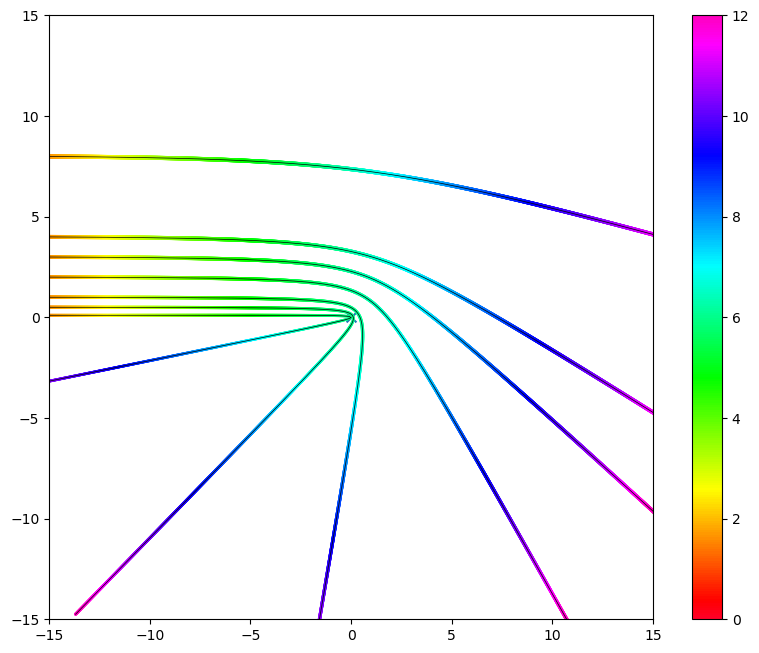

In [7]:
plt.figure(dpi=100, figsize=(10, 8))
plot_trajectories(rs, ts, iteration_time)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.colorbar()

# Discussion

* as total energy is positive (at infinity potential is close to zero, also we have positive kinetic energy) we expect to have hyperbolic trajectories

* all particles have 10^-4 mass, so we neglect interaction between them. Our simulation engine supports technically any number of particles, but simulation running time increases

* From the results, we conclude that the inclination angle increases as the impact parameter decreases.

* colorbar indicates time